In [27]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers
import tensorflow as tf

In [10]:
def ellipse(t, a, b, x0, y0):
    x = x0 + a*np.cos(t)
    y = x0 + b*np.sin(t)
    return x, y


def rotate(x, y, alph):
    x_ans = x*np.cos(alph) - y*np.sin(alph)
    y_ans = x*np.sin(alph) + y*np.cos(alph)
    return x_ans, y_ans

In [19]:
t = np.linspace(0, 2*np.pi, 200)
x1, y1 = ellipse(t, 0.4, 0.15, 0, 0)
x1, y1 = rotate(x1, y1, np.pi / 6)

x2, y2 = ellipse(t, 0.7, 0.5, 0, 0)
x2, y2 = rotate(x2, y2, - np.pi / 3)

x3, y3 = ellipse(t, 1, 1, 0, 0)

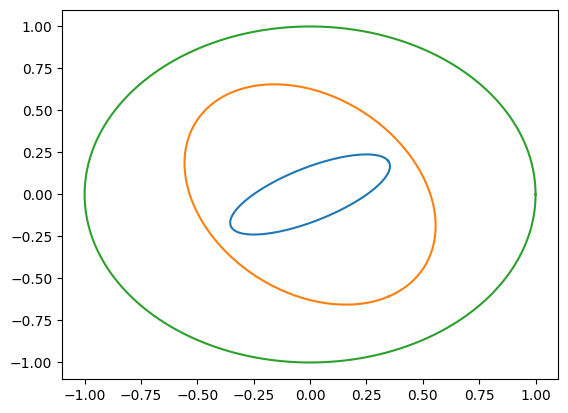

In [20]:
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)

In [22]:
data1 = [[cords, [1, 0, 0]] for cords in zip(x1, y1)]
data2 = [[cords, [0, 1, 0]] for cords in zip(x2, y2)]
data3 = [[cords, [0, 0, 1]] for cords in zip(x3, y3)]
dataset = data1 + data2 + data3

In [24]:
train_X = [x[0] for x in dataset]
train_y = [x[1] for x in dataset]

In [57]:
predictor =  keras.Sequential([
        layers.Dense(100,input_dim=2, activation="tanh", name="tanh"),
        layers.Dense(3,activation='sigmoid', name="sigmoid")
    ]
)
opt = keras.optimizers.Adam(learning_rate=0.1)
predictor.compile(loss='mse', optimizer=opt, metrics=['mae'])

In [58]:
predictor.fit(train_X, train_y, batch_size=len(dataset)//10, epochs=50, shuffle=True)

Epoch 1/50
 3/10 [========>.....................] - ETA: 0s - loss: 0.2582 - mae: 0.4600

2022-10-24 19:18:55.811072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 1s 27ms/step - loss: 0.2589 - mae: 0.4284
Epoch 2/50
10/10 [==============================] - 0s 35ms/step - loss: 0.2350 - mae: 0.4356
Epoch 3/50
10/10 [==============================] - 0s 25ms/step - loss: 0.2290 - mae: 0.4365
Epoch 4/50
10/10 [==============================] - 0s 26ms/step - loss: 0.2114 - mae: 0.4054
Epoch 5/50
10/10 [==============================] - 0s 28ms/step - loss: 0.1907 - mae: 0.3742
Epoch 6/50
10/10 [==============================] - 0s 30ms/step - loss: 0.1640 - mae: 0.3378
Epoch 7/50
10/10 [==============================] - 0s 30ms/step - loss: 0.1379 - mae: 0.3071
Epoch 8/50
10/10 [==============================] - 0s 30ms/step - loss: 0.1208 - mae: 0.2733
Epoch 9/50
10/10 [==============================] - 0s 26ms/step - loss: 0.1243 - mae: 0.2486
Epoch 10/50
10/10 [==============================] - 0s 31ms/step - loss: 0.1038 - mae: 0.2293
Epoch 11/50
10/10 [==============================] - 0s 34ms/step - lo

In [59]:
pole = [[(x,y) for x in np.linspace(-1,1,200)] for y in np.linspace(-1,1,200)]

In [66]:
z = []
for x_axis in reversed(pole):
    z.append(predictor.predict(x_axis))

7/7 [==============================] - 0s 6ms/step


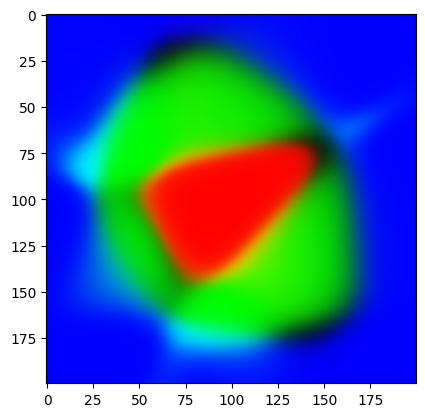

In [69]:
plt.imshow(z)

[array([[9.99803722e-01, 2.99973786e-03, 5.39630637e-05],
        [9.99795020e-01, 3.06940475e-03, 5.47100426e-05],
        [9.99785364e-01, 3.14539787e-03, 5.55063489e-05],
        [9.99774873e-01, 3.22808488e-03, 5.63536778e-05],
        [9.99763310e-01, 3.31787532e-03, 5.72537429e-05],
        [9.99750674e-01, 3.41521064e-03, 5.82081047e-05],
        [9.99736845e-01, 3.52061447e-03, 5.92192264e-05],
        [9.99721587e-01, 3.63466144e-03, 6.02892214e-05],
        [9.99704897e-01, 3.75798787e-03, 6.14205928e-05],
        [9.99686599e-01, 3.89130437e-03, 6.26158508e-05],
        [9.99666452e-01, 4.03539604e-03, 6.38783895e-05],
        [9.99644160e-01, 4.19116672e-03, 6.52106828e-05],
        [9.99619722e-01, 4.35956288e-03, 6.66164560e-05],
        [9.99592602e-01, 4.54166811e-03, 6.80994126e-05],
        [9.99562681e-01, 4.73872153e-03, 6.96634816e-05],
        [9.99529481e-01, 4.95202653e-03, 7.13126647e-05],
        [9.99492645e-01, 5.18309930e-03, 7.30514803e-05],
        [9.994